In [2]:
# Some used imports
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl
import nltk
import re
# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [174]:
comments = pd.read_csv("D:/QMSS/Spring/Thesis/CommentsMaster.csv",encoding='ISO-8859-1')


In [109]:
len(comments)

205773

In [33]:
comments.head()

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto
0,MSNBC,UgxQ2y-lYbB5Tkep8V14AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/14/2020 14:13,Bruce Molyneux,https://www.youtube.com/watch?v=DushIvQwmEM,https://www.youtube.com/watch?v=DushIvQwmEM,0,0,NaN
1,MSNBC,Ugx8DcWIY8ClLpyNWxF4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 15:27,Hybrid - Fahrer,Biden is for sure not \'the guy\'... Such bias...,Biden is for sure not \'the guy\'... Such bias...,0,0,NaN
2,MSNBC,UgwIDj3O6cWyqNQ-VdB4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 8:54,marc,biden is the best to appeal to rust belt voter...,biden is the best to appeal to rust belt voter...,0,0,NaN
3,MSNBC,Ugy-5qhLNf42usKd1M54AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 4:39,Conan Barbarian,"Well the title is correct, Democrats and diffe...","Well the title is correct, Democrats and diffe...",0,0,NaN
4,MSNBC,Ugyb1T0QLfC09sTmumZ4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 0:31,Marcel B.,You throw things up with Trump NOT by voting a...,You throw things up with Trump NOT by voting a...,0,0,NaN


In [42]:
comments = comments.dropna()
comments['tokenized_sents'] = comments.apply(lambda row: nltk.word_tokenize(row['description']), axis=1)


In [113]:
24*1800

43200

In [77]:
x = pd.DataFrame(comments['tokenized_sents'])
new = x.reset_index()
len(new)

107511

In [91]:
import numpy as np

In [100]:
df = []
for x in range(107511):
    df.append(len(new['tokenized_sents'].ix[x]))

### Avg 24 wods per comment

In [107]:
dff = pd.DataFrame(df, columns = ["one"])
dff['one'].mean()

24.888327706002176

### Avg 1821 comments per video 

In [110]:
205773/113

1821.0

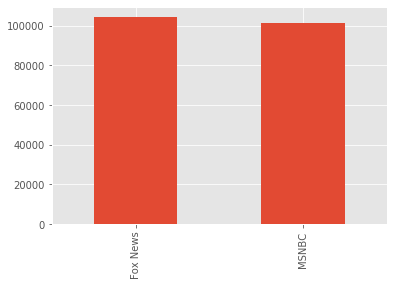

In [5]:
comments['Producer'].value_counts().plot.bar();

In [15]:
%timeit range(1000)

249 ns ± 65.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [160]:
!pip install stop-words

  Stored in directory: C:\Users\Mark\AppData\Local\pip\Cache\wheels\75\37\6a\2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [39]:
from nltk.corpus import stopwords
from stop_words import get_stop_words

stop_words = set(stopwords.words('english'))

stop_words.add("ð")
stop_words.add(" the")
stop_words.add("the ")
stop_words.add(" the ")
stop_words.add('like')
stop_words.add('would')



In [34]:
from nltk.corpus import stopwords

In [11]:
*nltk?

In [40]:
rows = list()
for row in comments[['Producer', 'words']].dropna().iterrows():
    r = row[1]
    for word in r.words:
        if word not in stop_words:
            rows.append((r.Producer, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

,book,description
0,MSNBC,h
1,MSNBC,p
2,MSNBC,:
3,MSNBC,/
4,MSNBC,/


In [191]:
words = words[words.word.str.len() > 4]
words.head()

,book,word
0,MSNBC,https
2,MSNBC,youtube
4,MSNBC,watch
6,MSNBC,dushivqwmem
7,MSNBC,biden


In [192]:
words['word'] = words.word.str.lower() 
words.head()

,book,word
0,MSNBC,https
2,MSNBC,youtube
4,MSNBC,watch
6,MSNBC,dushivqwmem
7,MSNBC,biden


In [193]:
counts = words.groupby('book')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

n_w
book     word            
Fox News trump      19718
         people      8854
         president   8755
         america     4838
         democrats   4733

n_w
book     word            
Fox News trump      19718
         people      8854
         president   8755
         america     4838
         democrats   4733
         american    4224
         country     4056
         think       4048
         obama       3817
         right       3666
MSNBC    trump      26979
         people      9081
         president   6385
         america     5344
         american    4443
         think       4272
         obama       4211
         going       4191
         world       4167
         country     3951

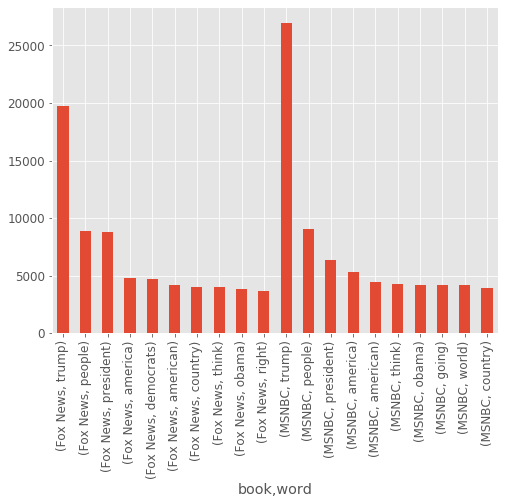

In [194]:
def pretty_plot_top_n(series, top_n=10, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

### Author Frequency

In [263]:
auth_counts = comments.groupby(['Producer', 'author']).size().reset_index(name='Appearences')
auth_counts.sort_values(by = ['Appearences'], ascending = False)[0:10]

,Producer,author,Appearences
47037,MSNBC,CShield,198
49354,MSNBC,Dave Schultz,145
69703,MSNBC,Trumpty Dumpty your fall is coming!,139
16669,Fox News,John Williams,138
61947,MSNBC,Naomi Ogle,135
66075,MSNBC,Samera K,132
43905,MSNBC,Al Shabob,130
77400,MSNBC,wily wascal,129
48540,MSNBC,Crystal Giddens,128
21339,Fox News,Masson H,125


### Popularity by like count

In [408]:
like_counts = comments.sort_values(by="likecount", ascending = False)


In [410]:
like_counts = like_counts[["Producer", "author", "likecount","description"]]

In [411]:
lc = like_counts.head(10)
lc

,Producer,author,likecount,description
192268,Fox News,T G,2740,Isnât it funny a socialist isnât âpaying...
24560,MSNBC,Joshua Morales,2442,Well 2020 started off with a bang...
105503,Fox News,Krispy Bacon,1829,Hey Omar? dont worry its none of your business...
104861,Fox News,Misaka Mikoto,1704,Ilhan Omar is mourning over another one of her...
127614,Fox News,Elmer T Fuddrucker,1679,John Kerry is having tantrums over the killing...
167157,Fox News,J G,1563,"if mike became governor of california, it woul..."
23688,MSNBC,SIN THE BIN,1535,I thought trump was in a peach?
127191,Fox News,RSKR,1534,the red line was crossed. they shouldnt be sur...
51193,MSNBC,Acme Page,1487,âSomeone who suggests that coal miners becom...
128014,Fox News,Anthony Alvaros,1418,Ilhan Omar is mourning over another one of her...


### Rank by users able to generate replies 

In [123]:
reply_counts = comments.isreplyto.value_counts()
reply_counts.head(10)

Alberto Raphael Pinto    580
David J                  399
Ryan Perry               345
V                        292
jon Q                    276
RSKR                     242
Laura Folsom             238
Elmer T Fuddrucker       233
Emperor Solo             220
Anthony Alvaros          217
Name: isreplyto, dtype: int64

In [16]:
comments[comments.author == "Alberto Raphael Pinto"]

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto
107185,Fox News,UgylwxEI69DKvYn5MT54AaABAg,https://www.youtube.com/watch?v=zoiGytDec90&lc...,1/3/2020 13:26,Alberto Raphael Pinto,Q. What\'s the one thing an arab would never g...,Q. What\'s the one thing an arab would never g...,0,3,NaN
107211,Fox News,UgyE6kJ2Rmh9f2_64Md4AaABAg,https://www.youtube.com/watch?v=zoiGytDec90&lc...,1/3/2020 13:26,Alberto Raphael Pinto,Q. What\'s the difference between E.T and an a...,Q. What\'s the difference between E.T and an a...,1,0,NaN
107219,Fox News,UgyjjcBdz1iqhyCMalB4AaABAg,https://www.youtube.com/watch?v=zoiGytDec90&lc...,1/3/2020 13:26,Alberto Raphael Pinto,Q. What\'s the difference between a run-over d...,Q. What\'s the difference between a run-over d...,0,1,NaN
127843,Fox News,UgxlyDp1D-gTzZiDwOx4AaABAg,https://www.youtube.com/watch?v=XBzBRE_dzC0&lc...,1/3/2020 20:46,Alberto Raphael Pinto,Hillary Clinton after leaving Americans to die...,Hillary Clinton after leaving Americans to die...,0,0,NaN
127863,Fox News,UgzlEf5UYYa2mTxRKy94AaABAg,https://www.youtube.com/watch?v=XBzBRE_dzC0&lc...,1/3/2020 20:46,Alberto Raphael Pinto,Hillary Clinton after turning Libya into a thi...,Hillary Clinton after turning Libya into a thi...,243,9,NaN
128223,Fox News,UgzjEWf5zu-A9xjVO5V4AaABAg,https://www.youtube.com/watch?v=XBzBRE_dzC0&lc...,1/3/2020 20:40,Alberto Raphael Pinto,Democ RATS crying because they can\'t make mon...,Democ RATS crying because they can\'t make mon...,293,17,NaN
128316,Fox News,Ugy4ALG_xfUYfK6nNoh4AaABAg,https://www.youtube.com/watch?v=XBzBRE_dzC0&lc...,1/3/2020 20:40,Alberto Raphael Pinto,Democ RATS hate America. But love Iran....Go f...,Democ RATS hate America. But love Iran....Go f...,279,24,NaN
152187,Fox News,Ugxrlx1m84N0gX4IC0t4AaABAg,https://www.youtube.com/watch?v=_D8Hd1eQeBg&lc...,1/6/2020 10:07,Alberto Raphael Pinto,Trump could literally stop a nuke from hitting...,Trump could literally stop a nuke from hitting...,147,29,NaN
152219,Fox News,Ugyun94ZRheAPsP46494AaABAg,https://www.youtube.com/watch?v=_D8Hd1eQeBg&lc...,1/6/2020 10:07,Alberto Raphael Pinto,Obama kills thousands with drone strike Hollyw...,Obama kills thousands with drone strike Hollyw...,2,0,NaN
152220,Fox News,UgwQr_fl2KkYU9VlfwV4AaABAg,https://www.youtube.com/watch?v=_D8Hd1eQeBg&lc...,1/6/2020 10:07,Alberto Raphael Pinto,The left thinks everything and anything is rac...,The left thinks everything and anything is rac...,0,0,NaN


### Alberto Raphael Pinto generated the most responses 
### These are the comments sorted by number of replies generated 

In [231]:
mostreplies = comments[comments.author == "Alberto Raphael Pinto"]
mostreplies.sort_values(by = "replycount", ascending = False)

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto,isreplyto_empty
184585,Fox News,UgzKpShK3kPjlB4XxWx4AaABAg,https://www.youtube.com/watch?v=ui5viD1F1hc&lc...,1/10/2020 23:28,Alberto Raphael Pinto,*Ask Nancy how she became multi millionaire wh...,*ask nancy how she became multi millionaire wh...,383,120,NaN,empty
187485,Fox News,Ugyy4hHkp2O77AFP0ot4AaABAg,https://www.youtube.com/watch?v=Qt-qPvzVXjY&lc...,1/11/2020 8:07,Alberto Raphael Pinto,*Ask Nancy how she became multi millionaire wh...,*ask nancy how she became multi millionaire wh...,398,81,NaN,empty
184718,Fox News,UgwmBzse18ci2g-BerB4AaABAg,https://www.youtube.com/watch?v=ui5viD1F1hc&lc...,1/10/2020 23:27,Alberto Raphael Pinto,*CAN SOMEONE NAME ONE THING NANCY PELOSI HAS D...,*can someone name one thing nancy pelosi has d...,174,77,NaN,empty
184511,Fox News,UgzeqLMsY2xxHI7OycJ4AaABAg,https://www.youtube.com/watch?v=ui5viD1F1hc&lc...,1/10/2020 23:29,Alberto Raphael Pinto,Pelosi - Against border wall and is for gun co...,pelosi - against border wall and is for gun co...,198,41,NaN,empty
194397,Fox News,UgwPEXS0AA93HD7lH5B4AaABAg,https://www.youtube.com/watch?v=bELxooMt3qg&lc...,1/11/2020 8:16,Alberto Raphael Pinto,*AOC thinks the electoral college is a school ...,*aoc thinks the electoral college is a school ...,177,36,NaN,empty
152187,Fox News,Ugxrlx1m84N0gX4IC0t4AaABAg,https://www.youtube.com/watch?v=_D8Hd1eQeBg&lc...,1/6/2020 10:07,Alberto Raphael Pinto,Trump could literally stop a nuke from hitting...,trump could literally stop a nuke from hitting...,147,29,NaN,empty
199290,Fox News,UgwCLqNiZQoDYemiTH94AaABAg,https://www.youtube.com/watch?v=FtrIxEB4k7Y&lc...,1/11/2020 21:13,Alberto Raphael Pinto,*The left hates trump because he\'s exposing t...,*the left hates trump because he\'s exposing t...,106,26,NaN,empty
128316,Fox News,Ugy4ALG_xfUYfK6nNoh4AaABAg,https://www.youtube.com/watch?v=XBzBRE_dzC0&lc...,1/3/2020 20:40,Alberto Raphael Pinto,Democ RATS hate America. But love Iran....Go f...,democ rats hate america. but love iran....go f...,279,24,NaN,empty
187435,Fox News,UgxwOF5KCRn_GtSVeJh4AaABAg,https://www.youtube.com/watch?v=Qt-qPvzVXjY&lc...,1/11/2020 8:08,Alberto Raphael Pinto,*CAN SOMEONE NAME ONE THING NANCY PELOSI HAS D...,*can someone name one thing nancy pelosi has d...,34,23,NaN,empty
199541,Fox News,UgwLkYKUSFMYwUBsa-B4AaABAg,https://www.youtube.com/watch?v=FtrIxEB4k7Y&lc...,1/11/2020 21:07,Alberto Raphael Pinto,*Liberal logic: when you know you can\'t win a...,*liberal logic: when you know you can\'t win a...,27,21,NaN,empty


### Comments that generated a response

In [225]:
for m in mostreplies["replycount"]:
    if m > 0:
        df=pd.DataFrame(mostreplies['description'])

,description
107185,q. what\'s the one thing an arab would never g...
107211,q. what\'s the difference between e.t and an a...
107219,q. what\'s the difference between a run-over d...
127843,hillary clinton after leaving americans to die...
127863,hillary clinton after turning libya into a thi...
128223,democ rats crying because they can\'t make mon...
128316,democ rats hate america. but love iran....go f...
152187,trump could literally stop a nuke from hitting...
152219,obama kills thousands with drone strike hollyw...
152220,the left thinks everything and anything is rac...


### Appearence by nonreply Comment

In [124]:
appearences = comments.author.value_counts()
appearences.head(10)

CShield                                198
David                                  172
Al Shabob                              152
Dave Schultz                           145
John Williams                          142
Trumpty Dumpty your fall is coming!    139
Naomi Ogle                             135
Samera K                               132
wily wascal                            129
Crystal Giddens                        128
Name: author, dtype: int64

In [338]:
#get the total number of likes that were recieved from all the comments stated by an individual user 
#what percentage of people left more than one comment 
#how many comments do those who recieve the most likes typically make?


pandas.core.series.Series

In [392]:
for auth in lc["author"]:
    x = (appearences.loc[auth])
    print(x)
    
#mean = 10.3    

8
1
13
13
10
23
1
6
9
19


In [7]:
replyto = comments.sort_values(by="replycount", ascending = False)


### Rank by amount of replies generated by single comment

In [181]:
replyto = comments.sort_values(by="replycount", ascending = False)
reply_counts = replyto[["Producer", "author","replycount", "likecount","description", "isreplyto"]]
rc = reply_counts.head(10)
rc

,Producer,author,replycount,likecount,description,isreplyto
37346,MSNBC,jon Q,276,1334,Republicans can only create two things: defici...,NaN
192268,Fox News,T G,247,2740,Isnât it funny a socialist isnât âpaying...,NaN
65282,MSNBC,Laura Folsom,231,435,What about the president who wanted our troops...,NaN
127614,Fox News,Elmer T Fuddrucker,221,1679,John Kerry is having tantrums over the killing...,NaN
205376,Fox News,Todd Ambrose,204,394,"The dnc, as we know it, will cease to exist by...",NaN
127191,Fox News,RSKR,195,1534,the red line was crossed. they shouldnt be sur...,NaN
49297,MSNBC,Simon West,193,688,Election coming up... Better have a war.,NaN
123887,Fox News,william rambo,192,1165,pretty soon the media will have this Iranian g...,NaN
41362,MSNBC,kurushiiv,186,697,He embezzled from charity while running for of...,NaN
155023,Fox News,Tonka Goldman,184,487,This action was NOT tyrannical. Salami was a l...,NaN


In [143]:
isreplyto_empty = comments["isreplyto"].fillna('empty')
comments['isreplyto_empty'] = isreplyto_empty
comments.head()

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto,isreplyto_empty
0,MSNBC,UgxQ2y-lYbB5Tkep8V14AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/14/2020 14:13,Bruce Molyneux,https://www.youtube.com/watch?v=DushIvQwmEM,https://www.youtube.com/watch?v=dushivqwmem,0,0,NaN,empty
1,MSNBC,Ugx8DcWIY8ClLpyNWxF4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 15:27,Hybrid - Fahrer,Biden is for sure not \'the guy\'... Such bias...,biden is for sure not \'the guy\'... such bias...,0,0,NaN,empty
2,MSNBC,UgwIDj3O6cWyqNQ-VdB4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 8:54,marc,biden is the best to appeal to rust belt voter...,biden is the best to appeal to rust belt voter...,0,0,NaN,empty
3,MSNBC,Ugy-5qhLNf42usKd1M54AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 4:39,Conan Barbarian,"Well the title is correct, Democrats and diffe...","well the title is correct, democrats and diffe...",0,0,NaN,empty
4,MSNBC,Ugyb1T0QLfC09sTmumZ4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 0:31,Marcel B.,You throw things up with Trump NOT by voting a...,you throw things up with trump not by voting a...,0,0,NaN,empty


In [173]:
replies = comments[comments.isreplyto_empty != "empty"]
    
    

In [179]:
replies["isreplyto_empty"].count() #of the 205,000 comments 107,511 were replies to others 

107511

### The Jon Q Comment that those 276 comments were in reply to 

In [201]:
comments[comments.author == "jon Q"]


,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto,isreplyto_empty
36397,MSNBC,Ugw7jRgiXe5i8LJeCXF4AaABAg.93Knx8DooCK93NVGPt_I5Z,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/4/2020 12:27,jon Q,Kakistocracy.,kakistocracy.,1,0,Finn Jacobsen,Finn Jacobsen
37346,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/3/2020 9:54,jon Q,Republicans can only create two things: defici...,republicans can only create two things: defici...,1334,276,NaN,empty


In [203]:
comments[comments.replycount ==276]["description"] #"Republicans can only create two things: deficits and war."

37346    republicans can only create two things: defici...
Name: description, dtype: object

### Jon Q was able to generate the most comments from a single comment
### "Republicans can only create two things: deficits and war."
#### the comments that replied to Jon Qs comment

In [185]:
mostinsp = comments[comments.isreplyto_empty == "jon Q"]

In [191]:
mostinsp["description"]

37347    @bj smithnra wants blacks and women and immigr...
37348                           @ron t nice lie. prove it.
37349    @mine finder yeah funny how trump already doub...
37350    @timothy kozlowski that honor goes to trump fo...
37351    â@mine finder so now you just resort to lyin...
37352    @patrick o\'ryan stupid people make stupid com...
37353    @youtube moderator it can be blamed on the cou...
37354    @gavin sherlock obama doubled the deficit. his...
37355    @bj smith president trump, is rent free in eve...
37356    @timothy kozlowski president obama is living r...
37357    @mine finder you are too ignorant to be making...
37358    @mine finder since when is record debt and def...
37359    register to vote or check to see if you can st...
37360    iranian trolls are already stiring the pot on ...
37361                              @darrin fry stay stupid
37362                            @darrin fry read this duh
37363                                      @darrin fry d

In [12]:
from collections import Counter

In [17]:
Counter(comments["Producer"]) #number of comments by source 

Counter({'MSNBC': 101379, 'Fox News': 104394})

In [13]:
comments.head()

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto
0,MSNBC,UgxQ2y-lYbB5Tkep8V14AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/14/2020 14:13,Bruce Molyneux,https://www.youtube.com/watch?v=DushIvQwmEM,https://www.youtube.com/watch?v=DushIvQwmEM,0,0,NaN
1,MSNBC,Ugx8DcWIY8ClLpyNWxF4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 15:27,Hybrid - Fahrer,Biden is for sure not \'the guy\'... Such bias...,Biden is for sure not \'the guy\'... Such bias...,0,0,NaN
2,MSNBC,UgwIDj3O6cWyqNQ-VdB4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 8:54,marc,biden is the best to appeal to rust belt voter...,biden is the best to appeal to rust belt voter...,0,0,NaN
3,MSNBC,Ugy-5qhLNf42usKd1M54AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 4:39,Conan Barbarian,"Well the title is correct, Democrats and diffe...","Well the title is correct, Democrats and diffe...",0,0,NaN
4,MSNBC,Ugyb1T0QLfC09sTmumZ4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 0:31,Marcel B.,You throw things up with Trump NOT by voting a...,You throw things up with Trump NOT by voting a...,0,0,NaN


In [4]:
import re

In [192]:
#url = comments["link"][2]
#url

In [5]:
videos = list()
for link in comments['link']:
    x = re.search('v=(.+?)&lc', link)
    videos.append(x.group(0))


In [6]:
uniq_vids = set(videos)

In [62]:
len(uniq_vids) #113 unique videos

113

In [90]:
import numpy as np

In [11]:
z = ' https://www.youtube.com/watch?'.join(uniq_vids)
link_list = np.array(z)
print(link_list)
#link_list.append(z)
#link_list.count()

v=vS2ZHi2ILqc&lc https://www.youtube.com/watch?v=hrS3hP2bUGY&lc https://www.youtube.com/watch?v=dhD3Hw3fXqY&lc https://www.youtube.com/watch?v=xgPAslfVn7I&lc https://www.youtube.com/watch?v=SdPzX4gV5jc&lc https://www.youtube.com/watch?v=leQVh3oVJtM&lc https://www.youtube.com/watch?v=XBzBRE_dzC0&lc https://www.youtube.com/watch?v=ui5viD1F1hc&lc https://www.youtube.com/watch?v=rUCersIiP-A&lc https://www.youtube.com/watch?v=o7BpaIXogd8&lc https://www.youtube.com/watch?v=5l5X66N9WNQ&lc https://www.youtube.com/watch?v=V00UJsDJfkw&lc https://www.youtube.com/watch?v=QeFowxtokKc&lc https://www.youtube.com/watch?v=zoiGytDec90&lc https://www.youtube.com/watch?v=z73YaaKIfOY&lc https://www.youtube.com/watch?v=V_aY-UpVSEU&lc https://www.youtube.com/watch?v=J55u20jkyQg&lc https://www.youtube.com/watch?v=7MrZTcrE4r0&lc https://www.youtube.com/watch?v=sluW0bkGOkk&lc https://www.youtube.com/watch?v=KYnoVJD7LmI&lc https://www.youtube.com/watch?v=TPCqqAnrEMc&lc https://www.youtube.com/watch?v=8g7vDhPksho

### Get YouTube Titles 

In [18]:
from crawler import crawler

my_path = 'D:\QMSS\Spring\Thesis\TitleGet'
the_query = 'qmss columbia'
num_docs = 1

my_func = crawler()

my_func.write_crawl_results(my_path, the_query, num_docs)

ModuleNotFoundError: No module named 'crawler'

In [17]:
class crawler(object):

    def my_scraper(self, tmp_url_in):
        from bs4 import BeautifulSoup
        import requests
        import re
        tmp_text = ''
        try:
            content = requests.get(tmp_url_in)
            soup = BeautifulSoup(content.text, 'html.parser')
    
            tmp_text = soup.findAll('p') 
    
            tmp_text = [word.text for word in tmp_text]
            tmp_text = ' '.join(tmp_text)
            tmp_text = re.sub('\W+', ' ', re.sub('xa0', ' ', tmp_text))
        except:
            pass
    
        return tmp_text
    
    def fetch_urls(self, query_tmp, cnt):
        #now lets use the following function that returns
        #URLs from an arbitrary regex crawl form google
    
        #pip install pyyaml ua-parser user-agents fake-useragent
        import requests
        from fake_useragent import UserAgent
        from bs4 import BeautifulSoup
        import re 
        ua = UserAgent()
    
        query = '+'.join(query_tmp.split())
        google_url = "https://www.youtube.com/watch?v" + query 
        print (google_url)
        response = requests.get(google_url, {"User-Agent": ua.random})
        soup = BeautifulSoup(response.text, "html.parser")

        result_div = soup.find_all('div', attrs = {'class': 'ZINbbc'})

        links = []
        titles = []
        descriptions = []
        for r in result_div:
            # Checks if each element is present, else, raise exception
            try:
                link = r.find('a', href = True)
                title = r.find('div', attrs={'class':'vvjwJb'}).get_text()
                description = r.find('div', attrs={'class':'s3v9rd'}).get_text()
    
                # Check to make sure everything is present before appending
                if link != '' and title != '' and description != '': 
                    links.append(link['href'])
                    titles.append(title)
                    descriptions.append(description)
            # Next loop if one element is not present
            except:
                continue  
    
        to_remove = []
        clean_links = []
        for i, l in enumerate(links):
            clean = re.search('\/url\?q\=(.*)\&sa',l)
    
            # Anything that doesn't fit the above pattern will be removed
            if clean is None:
                to_remove.append(i)
                continue
            clean_links.append(clean.group(1))

        return clean_links
 
    def write_crawl_results(self, the_path, my_query, the_cnt_in):
        #let use fetch_urls to get URLs then pass to the my_scraper function 
        import os
        import re
        
        the_urls_list = self.fetch_urls(my_query, the_cnt_in)
        try:
            os.makedirs(the_path + re.sub('[ ]+', '_', re.sub('"', '', my_query)))
        except:
            pass

        cnt = 0
        for word in the_urls_list:
            tmp_txt = self.my_scraper(word)
            if len(tmp_txt) != 0:
                try:
                    tmp_file = open(the_path + re.sub('[ ]+', '_', re.sub('"', '', my_query)) + '/' + str(cnt) + '.txt',"w") 
                    tmp_file.write(tmp_txt)
                    tmp_file.close()
                    print (word)
                    cnt += 1
                except:
                    pass

In [8]:
#for u in uniq:
 #   x = 'https://www.youtube.com/watch?'+ u
  #  print(x)
    
    

In [193]:
comments['description'] = comments.description.str.lower() 


### Check for presense of keywords

In [90]:

lib = pd.DataFrame(comments['description'].str.contains("liberal"))
lib.head()

,description
0,False
1,False
2,False
3,False
4,False


In [91]:
lib.description.value_counts()

False    203645
True       2125
Name: description, dtype: int64

### Presence of Hot words/phrases 

In [108]:
ndf= pd.DataFrame(comments['description'].str.contains("white nationalist"))
ndf.head()
ndf.description.value_counts()

False    205735
True         35
Name: description, dtype: int64

In [109]:
ndf= pd.DataFrame(comments['description'].str.contains("racist"))
ndf.head()
ndf.description.value_counts()

False    205011
True        759
Name: description, dtype: int64

In [433]:
ndf= pd.DataFrame(comments['description'].str.contains("communist"))
ndf.head()
ndf.description.value_counts()

False    205149
True        621
Name: description, dtype: int64

In [456]:
ndf= pd.DataFrame(comments['description'].str.contains("fascist"))
ndf.head()
ndf.description.value_counts()

False    205544
True        226
Name: description, dtype: int64

In [434]:
ndf= pd.DataFrame(comments['description'].str.contains("socialist"))
ndf.head()
ndf.description.value_counts()

False    204876
True        894
Name: description, dtype: int64

In [443]:
ndf= pd.DataFrame(comments['description'].str.contains("oil"))
ndf.head()
ndf.description.value_counts()

False    203560
True       2210
Name: description, dtype: int64

In [448]:
ndf= pd.DataFrame(comments['description'].str.contains("Constitution"))
ndf.head()
ndf.description.value_counts()

False    204673
True       1097
Name: description, dtype: int64

In [457]:
ndf= pd.DataFrame(comments['description'].str.contains("hate"))
ndf.head()
ndf.description.value_counts()

False    202180
True       3590
Name: description, dtype: int64

In [464]:
ndf= pd.DataFrame(comments['description'].str.contains("religion"))
ndf.head()
ndf.description.value_counts()

False    205543
True        227
Name: description, dtype: int64

In [21]:
comments.head()

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto
0,MSNBC,UgxQ2y-lYbB5Tkep8V14AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/14/2020 14:13,Bruce Molyneux,https://www.youtube.com/watch?v=DushIvQwmEM,https://www.youtube.com/watch?v=DushIvQwmEM,0,0,NaN
1,MSNBC,Ugx8DcWIY8ClLpyNWxF4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 15:27,Hybrid - Fahrer,Biden is for sure not \'the guy\'... Such bias...,Biden is for sure not \'the guy\'... Such bias...,0,0,NaN
2,MSNBC,UgwIDj3O6cWyqNQ-VdB4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 8:54,marc,biden is the best to appeal to rust belt voter...,biden is the best to appeal to rust belt voter...,0,0,NaN
3,MSNBC,Ugy-5qhLNf42usKd1M54AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 4:39,Conan Barbarian,"Well the title is correct, Democrats and diffe...","Well the title is correct, Democrats and diffe...",0,0,NaN
4,MSNBC,Ugyb1T0QLfC09sTmumZ4AaABAg,https://www.youtube.com/watch?v=llov1TBqnQ4&lc...,1/6/2020 0:31,Marcel B.,You throw things up with Trump NOT by voting a...,You throw things up with Trump NOT by voting a...,0,0,NaN


In [22]:
import numpy as np

In [57]:
print(comments.Producer[np.argmax(comments.description.str.len())])
print(comments.author[np.argmax(comments.description.str.len())])
print(comments.likecount[np.argmax(comments.description.str.len())])

print(comments.Producer[np.argmax(comments.likecount)])
print(comments.likecount[np.argmax(comments.likecount)])

MSNBC
Dan
0
Fox News
2740


In [59]:
print(comments.description[np.argmax(comments.description.str.len())])


As incomplete [b/c Mueller failed to follow the MONEY which is what links Russian Oligarchy to DJT, specifically the unlawful money laundering] as the MUELLER INVESTIGATION was, it showed us these things: [1] MUELLER INVESTIGATION ACTUALLY MADE MONEY for the USA - NO COST TO TAXPAYERS: The Investigation more than paid for itself via fines, restitution  asset forfeiture. https://thinkprogress.org/at-a-reported-cost-of-25-million-mueller-probe-has-paid-for-itself-76fdcee15c9b/ [2] USA ELECTION WAS ATTACKED by Cambridge Analytica ("CA")  Russia [Internet Research Agency ("IRA")]: The investigation showed the USA was attacked by Cambridge Analytica ("CA") and Russia  Russian Organized Crime (Oligarchy) via the St. Petersburg, Russia based IRA. Even if you have not read the entire Redacted Mueller Report, just read paragraph #2 of the Introduction. The Investigation clearly concludes Russia attacked the 2016 USA Election. Here is the url to the Redacted Mueller Report.Â  https://www.documen

In [60]:
print(comments.description[np.argmax(comments.likecount)])

Isnât it funny a socialist isnât âpaying her fair share?â


### Chapter 5 Machine Learning

1. feature -> column 
2. sample -> row

### The Approach 

1. Choose a class of model by importing the appropriate estimator class from ScikitLearn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:

• For supervised learning, often we predict labels for unknown data using the
predict() method.

• For unsupervised learning, we often transform or infer properties of the data
using the transform() or predict() method.

In [19]:
import matplotlib.pyplot as plt 
import numpy as np 

In [20]:
10*(np.random.RandomState(42).rand(50))

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [4]:
X = comments['replycount'].values
y = comments['likecount'].values
#plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
dat = comments[['replycount','likecount']].values
df =pd.DataFrame(data=dat, columns = ["replycount",'likecount'])

In [11]:
model = smf.ols('likecount~replycount',data=df).fit()

In [12]:
print(model.summary()) #for each additional reply to a comment a user can expect to see 
#and average likecount increase by 5.32 likes 

                            OLS Regression Results                            
Dep. Variable:              likecount   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                 2.903e+05
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:16:26   Log-Likelihood:            -8.8972e+05
No. Observations:              205773   AIC:                         1.779e+06
Df Residuals:                  205771   BIC:                         1.779e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2933      0.041     31.859      0.0

In [43]:
model = LinearRegression(fit_intercept=True)

In [14]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
comments["replycount"].max()

276

In [15]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(model.coef_)
print(model.intercept_)

[[5.32165169]]
[1.29331829]


In [17]:
xfit = np.linspace(-1,276, num = 205773 )
Xfit = xfit[:,np.newaxis]
model.fit(X,y)
yfit=model.predict(Xfit)

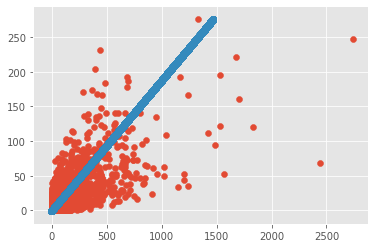

In [23]:
plt.scatter(y,X)
plt.scatter(yfit,Xfit)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

### Individual Regressions for Fox & MSNBC

In [32]:
foxnews = comments[101379:]
msnbc = comments[:101379]

In [36]:
dat_fox = foxnews[['replycount','likecount']].values
df_fox =pd.DataFrame(data=dat_fox, columns = ["replycount",'likecount'])

dat_msnbc = msnbc[['replycount','likecount']].values
df_msnbc =pd.DataFrame(data=dat_msnbc, columns = ["replycount",'likecount'])

In [37]:
model_msnbc = smf.ols('likecount~replycount',data=df_msnbc).fit()
model_fox = smf.ols('likecount~replycount',data=df_fox).fit()

In [38]:
print(model_msnbc.summary())

                            OLS Regression Results                            
Dep. Variable:              likecount   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 1.286e+05
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:28:05   Log-Likelihood:            -4.3570e+05
No. Observations:              101379   AIC:                         8.714e+05
Df Residuals:                  101377   BIC:                         8.714e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2750      0.056     22.607      0.0

In [39]:
print(model_fox.summary())

                            OLS Regression Results                            
Dep. Variable:              likecount   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 1.655e+05
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:28:14   Log-Likelihood:            -4.5287e+05
No. Observations:              104394   AIC:                         9.057e+05
Df Residuals:                  104392   BIC:                         9.058e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3300      0.058     23.023      0.0

### Fox Plot

In [41]:
Xfox = foxnews['replycount'].values
yfox = foxnews['likecount'].values

In [42]:
Xfox = Xfox.reshape(-1,1)
yfox = yfox.reshape(-1,1)

In [47]:
xfit = np.linspace(-1,276, num = 205773 )
Xfit = xfit[:,np.newaxis]
model.fit(Xfox,yfox)
yfit=model.predict(Xfit)

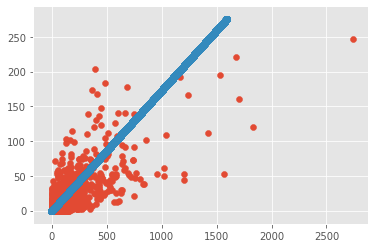

In [48]:
plt.scatter(yfox,Xfox)
plt.scatter(yfit,Xfit)
#estimated slope: 250 replies / 1500 likes (0.167) ie: one can expect a comment with 1 reply to have 6 likes 

### MSNBC Plot

In [50]:
Xmsnbc = msnbc['replycount'].values
ymsnbc = msnbc['likecount'].values

Xmsnbc = Xmsnbc.reshape(-1,1)
ymsnbc = ymsnbc.reshape(-1,1)

In [51]:
xfit = np.linspace(-1,276, num = 205773 )
Xfit = xfit[:,np.newaxis]
model.fit(Xmsnbc,ymsnbc)
yfit=model.predict(Xfit)

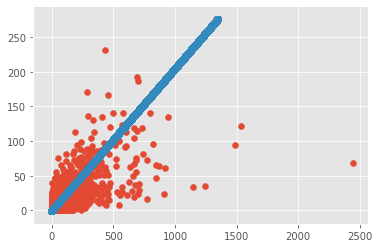

In [52]:
plt.scatter(ymsnbc,Xmsnbc)
plt.scatter(yfit,Xfit)

#rough slope, 2 replies/10 likes (0.2) ie: one can expect a commet with one reply to have 5 likes 

### A Classification model?

In [167]:
model = GaussianNB()

In [168]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)
model.fit(Xtrain, ytrain)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [169]:
y_model=model.predict(Xtest)

In [124]:
from sklearn.metrics import accuracy_score


In [170]:
accuracy_score(ytest,y_model) #roughly the same as R^2 from OLS

0.5677046885934219

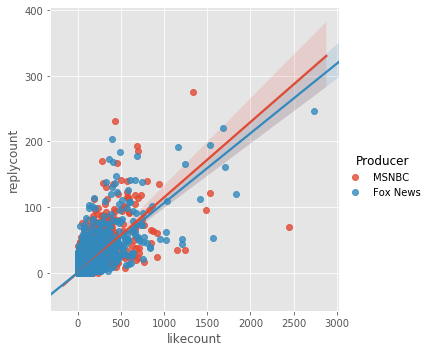

In [185]:
sns.lmplot("likecount",'replycount',hue="Producer", data = comments, fit_reg=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
X = comments.sample(n= 500)
y = comments.sample(n=500)
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

### Classifier 

In [366]:
train = comments.sample(n= 50000)
test = comments.sample(n=50000)

In [155]:
categories = {1:"MSNBC",2:"Fox News"}
categories = ["MSNBC","Fox News"]

In [201]:
tr_prod=list(train.Producer)
tr_desc=list(train.description)
ts_desc=list(test.description)
ts_prod=list(test.Producer)


In [149]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [36]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [65]:
model.fit(tr_desc, tr_prod)
labels = model.predict(ts_desc)

Text(91.68, 0.5, 'predicted label')

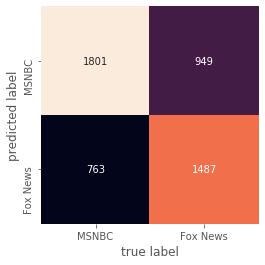

In [66]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.Producer,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=categories,yticklabels=categories)
plt.xlabel("true label")
plt.ylabel('predicted label') 

In [83]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(pred[0])
   

In [86]:
predict_category("Two jobs, make ends meet blah blah blah. Their portfolios must be brimming with all the gains in the stock markets! Too much winning and too much whining!")

MSNBC


In [94]:
predict_category("You were the District Attorney for Westchester County! You were never a judge! Btw, tell Al King says hello. Are yâ\x80\x99all still together?")

Fox News


In [10]:
comments.description[200000]


'You were the District Attorney for Westchester County! You were never a judge! Btw, tell Al King says hello. Are yâ\x80\x99all still together?'

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [23]:
cmls = comments.description.dropna().tolist()


In [142]:
vect = CountVectorizer(stop_words='english').fit(tr_desc)

In [143]:
X_train= vect.transform(tr_desc)
#bag_of_words

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [144]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, tr_prod)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.69


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(tr_desc, tr_prod)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.69


In [147]:
labels = grid.predict(ts_desc)

Text(91.68, 0.5, 'predicted label')

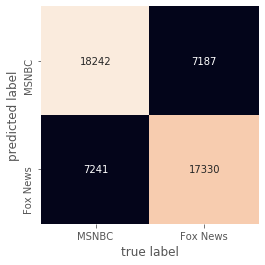

In [156]:
mat = confusion_matrix(test.Producer,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=categories,yticklabels=categories)
plt.xlabel("true label")
plt.ylabel('predicted label') 

In [ ]:
#assign label based on comments content 
#classiy to labels 
#only work with influence data 

### Attempt to Construct By Hand

In [24]:
from nltk.cluster import KMeansClusterer
from sklearn.base import BaseEstimator, TransformerMixin

class KMeansClusters(BaseEstimator, TransformerMixin):

    def __init__(self, k=7):
        """
        k is the number of clusters
        model is the implementation of Kmeans
        """
        self.k = k
        self.distance = nltk.cluster.util.cosine_distance
        self.model = KMeansClusterer(self.k, self.distance,
                                     avoid_empty_clusters=True)
    
    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        """
        Fits the K-Means model to one-hot vectorized documents.
        """
        return self.model.cluster(documents, assign_clusters=True)

In [25]:
import os
from gensim.corpora import Dictionary
from gensim.matutils import sparse2full

In [26]:
class GensimVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, path="program"):
        self.path = path
        self.id2word = None
        self.load()
    
    def load(self):
        if os.path.exists(self.path):
            self.id2word = Dictionary.load(self.path)
    
    def save(self):
        self.id2word.save(self.path)
        def fit(self, documents, labels=None):
            self.id2word = Dictionary(documents)
            self.save()
            return self

    def transform(self, documents):
        for document in documents:
            docvec = self.id2word.doc2bow(document)
            yield sparse2full(docvec, len(self.id2word))

In [27]:
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import wordnet

In [28]:
class TextNormalizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, language='english'):
        self.stopwords = set(nltk.corpus.stopwords.words(language))
        self.lemmatizer = nltk.stem.WordNetLemmatizer()
    
    def is_punct(self, token):
        return all(
            unicodedata.category(char).startswith('P') for char in token)
    
    def is_stopword(self, token):
        return token.lower() in self.stopwords
    
    def normalize(self, document):
        return [
            self.lemmatize(token, tag).lower()
            for paragraph in document
            for sentence in paragraph
            for (token, tag) in sentence
            if not self.is_punct(token) and not self.is_stopword(token)
]
    def lemmatize(self, token, pos_tag):
        tag = {
            'N': wn.NOUN,
            'V': wn.VERB,
            'R': wn.ADV,
            'J': wn.ADJ
        }.get(pos_tag[0], wn.NOUN)
        return self.lemmatizer.lemmatize(token, tag)
    
    def fit(self, X, y=None):
        return self
   
    def transform(self, documents):
        for document in documents:
            yield self.normalize(document)
    
    

In [29]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
model = Pipeline([
    ('normalizer', TextNormalizer()),
    ('vectorizer', GensimVectorizer()),
    ('bayes', MultinomialNB()),
])

In [183]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, param_grid={
'count__analyzer': ['word', 'char', 'char_wb'],
'count__ngram_range': [(1,1), (1,2), (1,3), (1,4), (1,5), (2,3)],
'onehot__threshold': [0.0, 1.0, 2.0, 3.0],
'bayes__alpha': [0.0, 1.0],
})

### Tutorial (Document Clustering) 
http://brandonrose.org/clustering

In [30]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [32]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [33]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [34]:
cmts = list(comments.sample(n= 100,random_state=1).description)
titles = list(comments.sample(n=100,random_state=1).Producer)

In [3]:
cmts = list(comments.description)[37347:37623]
#cmts

In [35]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in cmts:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [36]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

print('there are '+ str(vocab_frame.shape[0]) + ' items in vocab_frame')



there are 1990 items in vocab_frame


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=1, max_features=50,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(cmts) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(100, 50)


In [38]:
terms = tfidf_vectorizer.get_feature_names()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [40]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [41]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [42]:
yt = { 'title': titles, 'synopsis': cmts, 'cluster': clusters}
frame = pd.DataFrame(yt, index = [clusters] , columns = ['title', 'cluster','synopsis'])

In [43]:
frame['cluster'].value_counts()

0    96
4     1
3     1
2     1
1     1
Name: cluster, dtype: int64

In [45]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'impeachment', b'retired', b'honest', b'goverment', b'please', b'foundations',

Cluster 0 titles: Fox News, MSNBC, Fox News, Fox News, Fox News, Fox News, MSNBC, Fox News, MSNBC, Fox News, Fox News, Fox News, Fox News, MSNBC, Fox News, MSNBC, Fox News, MSNBC, Fox News, MSNBC, Fox News, MSNBC, MSNBC, Fox News, MSNBC, MSNBC, Fox News, Fox News, MSNBC, Fox News, Fox News, MSNBC, Fox News, Fox News, MSNBC, Fox News, Fox News, MSNBC, Fox News, Fox News, Fox News, Fox News, Fox News, MSNBC, Fox News, Fox News, MSNBC, MSNBC, Fox News, MSNBC, Fox News, MSNBC, Fox News, MSNBC, Fox News, MSNBC, MSNBC, MSNBC, Fox News, MSNBC, Fox News, MSNBC, MSNBC, Fox News, MSNBC, MSNBC, Fox News, MSNBC, MSNBC, Fox News, Fox News, Fox News, Fox News, Fox News, Fox News, MSNBC, MSNBC, Fox News, MSNBC, MSNBC, Fox News, Fox News, MSNBC, MSNBC, Fox News, MSNBC, Fox News, Fox News, Fox News, MSNBC, MSNBC, MSNBC, MSNBC, Fox News, MSNBC, MSNBC,

Cluster 1 words: b'hyperbole', 

### Multidimensional Scaling

In [46]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print(xs)
print(ys)

[-0.0362155  -0.75742529 -0.29980639 -0.29429065 -0.03966316 -0.02775808
 -0.29187528 -0.64116424 -0.0305019  -0.37146596  0.43994156 -0.20045392
  0.55074403 -0.391475   -0.41259952 -0.64014501  0.75553514  0.34244371
  0.35236909 -0.68868245  0.7183528  -0.13731666 -0.55188487  0.65282652
 -0.13020079 -0.72757674 -0.19039167 -0.00105417  0.24861723  0.23330565
 -0.50256258  0.35634296 -0.72580444  0.37156585  0.77528215  0.57566263
 -0.50899758 -0.02007231  0.73799232  0.46134049  0.57220932  0.52199861
 -0.18974962 -0.04472089  0.37776564 -0.38888174  0.08575485 -0.02739222
  0.6901517  -0.76198264 -0.18771787  0.67340997  0.73232945 -0.59951954
  0.28146008 -0.25015157  0.69853911 -0.60248867  0.35860025  0.4127172
 -0.47759746 -0.61088475  0.57292448  0.06708328 -0.46671954  0.1048755
  0.22801287  0.5273167   0.58354827  0.59659385  0.10005122 -0.50583188
 -0.59515766 -0.41092018  0.11085039 -0.50586032  0.1289015  -0.30064653
 -0.39359291  0.65138932 -0.32545479  0.21610856 -0.2

### Hierarchical document clustering

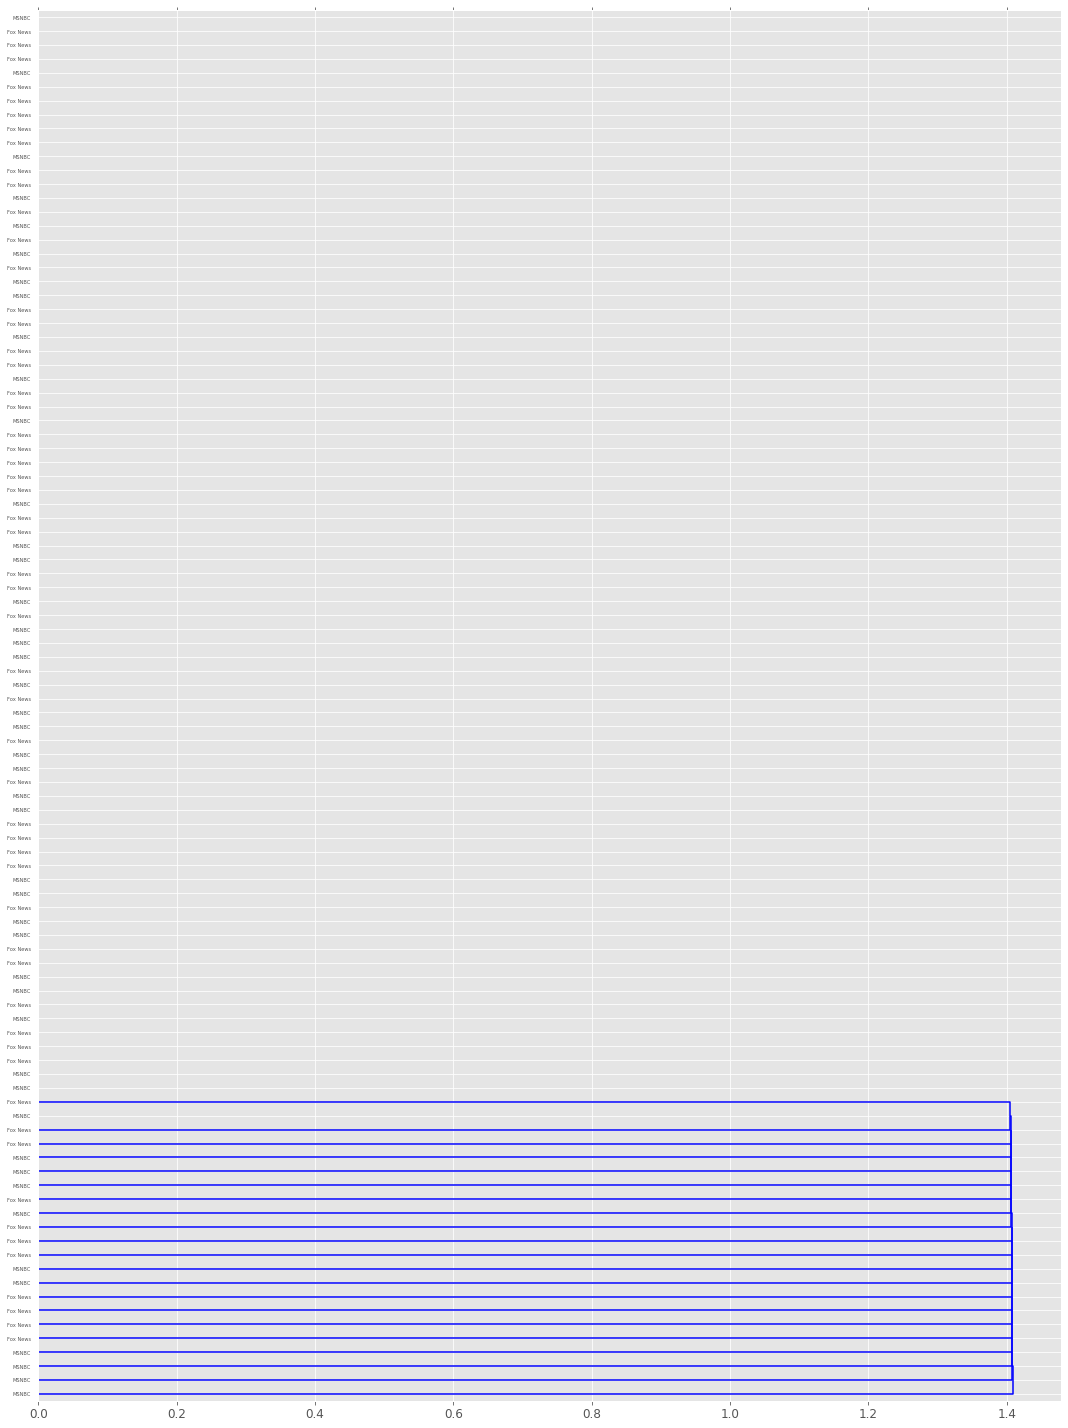

In [47]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

### LDA Latent Dirichlet Allocation

In [285]:
len(cmts)

276

In [48]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [49]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [283]:
from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in cmts]

#tokenize
tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

In [286]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [292]:
lda = models.LdaModel(corpus, num_topics=2, 
                            id2word=dictionary, 
                            update_every=5, 
                            chunksize=10000, 
                            passes=100)

In [293]:
lda.show_topics()

[(0,
  '0.013*"\'s" + 0.012*"deficit" + 0.011*"war" + 0.008*"peopl" + 0.008*"economi" + 0.008*"stupid" + 0.007*"ra5928" + 0.007*"money" + 0.007*"us" + 0.007*"think"'),
 (1,
  '0.013*"https" + 0.012*"\'s" + 0.007*"make" + 0.007*"war" + 0.006*"alli" + 0.006*"want" + 0.006*"countri" + 0.006*"didn\\\'t" + 0.006*"someth" + 0.006*"say"')]

In [297]:
topics_matrix = lda.show_topics(formatted=False, num_words=40)
topics_matrix = np.array(topics_matrix)

topics_matrix

array([[0,
        list([("'s", 0.012539691), ('deficit', 0.011732329), ('war', 0.010741795), ('peopl', 0.008325772), ('economi', 0.007936581), ('stupid', 0.007761519), ('ra5928', 0.0072896616), ('money', 0.007257983), ('us', 0.007223447), ('think', 0.0065225433), ('year', 0.006286904), ('jon', 0.006199879), ('know', 0.0061738538), ('bailout', 0.0060313633), ('lie', 0.0060216), ('histori', 0.0060104937), ('becaus', 0.0059986906), ('creat', 0.0058463453), ('like', 0.005467504), ('way', 0.0054442342), ('kill', 0.005399082), ('electr', 0.0052638007), ('presid', 0.004817341), ('good', 0.0047988263), ('dure', 0.0047606444), ('forget', 0.0046540746), ('made', 0.004177573), ('onli', 0.0041634985), ('go', 0.0041606775), ("don\\'t", 0.004126321), ('ha', 0.0041227513), ('sinc', 0.0040698005), ('thing', 0.0037699211), ('got', 0.0035567482), ('want', 0.0035328583), ('moron', 0.003509299), ('get', 0.003504069), ('well', 0.0034912683), ('unemploy', 0.0034911886), ('gave', 0.0034911078)])],
       [1

In [298]:
topic_words = topics_matrix[:,1]
for i in topic_words:
    print(pd.DataFrame([str(word) for word in i]))

                             0
0          ("'s", 0.012539691)
1     ('deficit', 0.011732329)
2         ('war', 0.010741795)
3       ('peopl', 0.008325772)
4     ('economi', 0.007936581)
5      ('stupid', 0.007761519)
6     ('ra5928', 0.0072896616)
7       ('money', 0.007257983)
8          ('us', 0.007223447)
9      ('think', 0.0065225433)
10       ('year', 0.006286904)
11        ('jon', 0.006199879)
12      ('know', 0.0061738538)
13   ('bailout', 0.0060313633)
14          ('lie', 0.0060216)
15   ('histori', 0.0060104937)
16    ('becaus', 0.0059986906)
17     ('creat', 0.0058463453)
18       ('like', 0.005467504)
19       ('way', 0.0054442342)
20       ('kill', 0.005399082)
21    ('electr', 0.0052638007)
22     ('presid', 0.004817341)
23      ('good', 0.0047988263)
24      ('dure', 0.0047606444)
25    ('forget', 0.0046540746)
26       ('made', 0.004177573)
27      ('onli', 0.0041634985)
28        ('go', 0.0041606775)
29    ("don\\'t", 0.004126321)
30        ('ha', 0.0041227513)
31      

liberal = 0
conservative = 1 

#### assign labels to classify based on these groupings of words 
- 1&3 = conservative 
- 2&4 = liberal 

In [ ]:
conservative = ['impeach','because','president','year','come','like','need',"doen\\'t",'socialist',
           'before','vote','retire','lie','attack','truth','money','mean','us','us','pay','give','take',
               'time','would','else','government','something','north','administration','money','people','look',
               'soon','took','smart','lock','million','reson','terrorist','secure','anounce']

liberal = ['go','see','attack','pretect','online','around','it','prison','torture','also','send',
               'crime','think','air','stupid','long','lie','stop','enought','one','people','war',
           'like','good', 'want','yet','keep','smart','senate','talk','forget','america','lol','counties',
           'leave','say']

libcon = liberal+conservative

In [16]:
conservative = ['impeach','because','president','year','come','like','need',"doen\\'t",'socialist',
           'before','vote','retire','lie','attack','truth','money','mean','us','us','pay','give','take',
               'time','would','else','government','something','north','administration','money','people','look',
               'soon','took','smart','lock','million','reson','terrorist','secure','anounce','liberty','freedom','personal',
               'courage','field','show','initiative','taxes','defend','spending','distinguished','spirit','americas','individual',
               'requires','god','message','advance','justice','proposal','true','speaker','yet','recent','dangerous','friends']

liberal = ['go','see','attack','pretect','online','around','it','prison','torture','also','send',
               'crime','think','air','stupid','long','lie','stop','enought','one','people','war',
           'like','good', 'want','yet','keep','smart','senate','talk','forget','america','lol','counties',
           'leave','say', 'think','buisnesses', 'dollar', 'large', 'bill','raise', 'cuts','wages','countries', 'food','credit',
          'million','north','fiscal','deficit','housing','financial','homes','asia','prevent','line','least','challenege',
           'four','buisness','competition']

libcon = liberal+conservative


In [631]:
print(len(conservative))
print(len(liberal))

67
62


In [5]:
import pandas as pd
import re
import nltk

### Start Here

In [17]:
replyto = comments.sort_values(by="replycount", ascending = False)
reply_counts = replyto[["Producer", "author","replycount", "likecount","description", "isreplyto"]]
rc = reply_counts.head(10)
rc

,Producer,author,replycount,likecount,description,isreplyto
37346,MSNBC,jon Q,276,1334,Republicans can only create two things: defici...,NaN
192268,Fox News,T G,247,2740,IsnÛªt it funny a socialist isnÛªt ÛÏpaying...,NaN
65282,MSNBC,Laura Folsom,231,435,What about the president who wanted our troops...,NaN
127614,Fox News,Elmer T Fuddrucker,221,1679,John Kerry is having tantrums over the killing...,NaN
205376,Fox News,Todd Ambrose,204,394,"The dnc, as we know it, will cease to exist by...",NaN
127191,Fox News,RSKR,195,1534,the red line was crossed. they shouldnt be sur...,NaN
49297,MSNBC,Simon West,193,688,Election coming up... Better have a war.,NaN
123887,Fox News,william rambo,192,1165,pretty soon the media will have this Iranian g...,NaN
41362,MSNBC,kurushiiv,186,697,He embezzled from charity while running for of...,NaN
155023,Fox News,Tonka Goldman,184,487,This action was NOT tyrannical. Salami was a l...,NaN


In [18]:
import re
import nltk
import pandas as pd

In [19]:
df = pd.DataFrame()

df["comments"]=comments['description'].dropna()

df['comments_lower'] = df['comments'].str.lower()

#df.iloc[0]['comments_lower']
#df["tokenize"] = nltk.word_tokenize(cmtslow)

#df['lettersonly'] = df.apply(lambda row: re.sub('[^a-zA-z]','', row['comments']), axis = 1)
#df
#df['tokenized_comments'] = df.apply(lambda row: nltk.word_tokenize(row['comments_lower']), axis=1)


In [20]:
df.head()

,comments,comments_lower
0,https://www.youtube.com/watch?v=DushIvQwmEM,https://www.youtube.com/watch?v=dushivqwmem
1,Biden is for sure not \'the guy\'... Such bias...,biden is for sure not \'the guy\'... such bias...
2,biden is the best to appeal to rust belt voter...,biden is the best to appeal to rust belt voter...
3,"Well the title is correct, Democrats and diffe...","well the title is correct, democrats and diffe..."
4,You throw things up with Trump NOT by voting a...,you throw things up with trump not by voting a...


In [21]:
def identify_tokens(row):
    comments_lower = row['comments_lower']
    tokens = nltk.word_tokenize(comments_lower)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['tokenize'] = df.apply(identify_tokens, axis=1)



In [332]:
tokenized = df['tokenize'][155021:155206]
df_3 = pd.DataFrame(tokenized)
df_3

,tokenize
155023,"[this, action, was, not, tyrannical, salami, w..."
155024,"[newsom, is, burning, the, people, out, of, ca..."
155025,"[jeragen, hope, in, their, own, satanic, world]"
155026,"[emil, gunnary, they, want, so, bad, because, ..."
155027,"[emil, gunnary, looks, like, trump, care, abou..."
155028,"[emil, gunnary, fyi, trump, tried, to, secretl..."
155029,"[emil, gunnary, cool, cool, use, your, slimy, ..."
155030,"[jarrod, goforth, biden, is, on, video, of, do..."
155031,"[shark, cat, why, do, you, want, so, bad]"
155032,"[emil, gunnary, yeah, someone, is, brain, wash..."


In [333]:
dic = []
for w in df['tokenize'][155021:155206]:
    for x in w:
        if x in conservative:
            dic.append(x + " Conservative")
        if x in liberal:
            dic.append(x + " Liberal")
        if x not in libcon:
            dic.append(x+ " Nuetral")
    
     


In [334]:
df2 = pd.DataFrame(dic)
len(df2)

3572

In [335]:
length = len(df_3)
length

185

In [336]:
df2.head()

,0
0,this Nuetral
1,action Nuetral
2,was Nuetral
3,not Nuetral
4,tyrannical Nuetral


In [337]:
df3 = df_3.reset_index()

In [338]:
df2 =pd.concat([df2,df3], ignore_index = True, axis =1)


In [339]:
df2.columns = ['wordlabels','index','tokenized_comments']
#len(df2['tokenized_comments'][2])

In [340]:
df2 = df2[['wordlabels','tokenized_comments']]
df2.head()

,wordlabels,tokenized_comments
0,this Nuetral,"[this, action, was, not, tyrannical, salami, w..."
1,action Nuetral,"[newsom, is, burning, the, people, out, of, ca..."
2,was Nuetral,"[jeragen, hope, in, their, own, satanic, world]"
3,not Nuetral,"[emil, gunnary, they, want, so, bad, because, ..."
4,tyrannical Nuetral,"[emil, gunnary, looks, like, trump, care, abou..."


In [341]:
total = 0
for tc in df2['tokenized_comments']:
    if type(tc) is list: 
        total += len(tc)
total

3534

In [342]:
xf = []
for tc in df2['tokenized_comments']:
    if type(tc) is list:
        xf.append(np.full(len(tc),2,np.int))
xf

[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array

In [343]:
s =pd.DataFrame(xf)
df3 = s.T
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0


In [344]:
df4 = []
for n in range(length):
    df4.append(df3[n].replace(2,n))

    
df5 = pd.DataFrame(df4).T
df5.head(10)


,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0
1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
3,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
6,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
7,0.0,1.0,NaN,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,NaN,182.0,183.0,184.0
8,0.0,1.0,NaN,3.0,4.0,5.0,6.0,7.0,NaN,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,NaN,182.0,183.0,184.0
9,0.0,1.0,NaN,3.0,4.0,5.0,6.0,7.0,NaN,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,NaN,182.0,NaN,184.0


In [345]:
df5.head()

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0
1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
3,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0
4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,175.0,176.0,177.0,NaN,179.0,180.0,181.0,182.0,183.0,184.0


In [346]:
xyz = []
for x in df5.columns:
    for n in df5[x]:
        if n>=0:
            xyz.append(n)

df7 = pd.DataFrame(xyz)
df7.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [347]:
#df2 = pd.DataFrame(dic).join(df['tokenized_comments'])
df2.columns = ['wordlabels', 'tokenized_comments']
df2.head()

,wordlabels,tokenized_comments
0,this Nuetral,"[this, action, was, not, tyrannical, salami, w..."
1,action Nuetral,"[newsom, is, burning, the, people, out, of, ca..."
2,was Nuetral,"[jeragen, hope, in, their, own, satanic, world]"
3,not Nuetral,"[emil, gunnary, they, want, so, bad, because, ..."
4,tyrannical Nuetral,"[emil, gunnary, looks, like, trump, care, abou..."


In [348]:
df2["comment_index"] = df7

In [349]:
df2.head()

,wordlabels,tokenized_comments,comment_index
0,this Nuetral,"[this, action, was, not, tyrannical, salami, w...",0.0
1,action Nuetral,"[newsom, is, burning, the, people, out, of, ca...",0.0
2,was Nuetral,"[jeragen, hope, in, their, own, satanic, world]",0.0
3,not Nuetral,"[emil, gunnary, they, want, so, bad, because, ...",0.0
4,tyrannical Nuetral,"[emil, gunnary, looks, like, trump, care, abou...",0.0


In [350]:
s =df2.groupby("comment_index")['wordlabels'].apply(list)

In [351]:
flat_list = [item for sublist in counts for item in sublist]


In [352]:
for x in range(length):
    ideology(x)
    

Nuetral
Conservative
Nuetral
Liberal
Liberal
Nuetral
Conservative
Conservative
Nuetral
Liberal
Liberal
Liberal
Liberal
Nuetral
Liberal
Liberal
Nuetral
Nuetral
Nuetral
Conservative
Nuetral
Nuetral
Nuetral
Nuetral
Liberal
Liberal
Liberal
Nuetral
Liberal
Liberal
Nuetral
Nuetral
Conservative
Conservative
Nuetral
Conservative
Conservative
Liberal
Liberal
Nuetral
Nuetral
Nuetral
Nuetral
Nuetral
Nuetral
Nuetral
Conservative
Liberal
Conservative
Liberal
Conservative
Nuetral
Liberal
Conservative
Nuetral
Conservative
Liberal
Nuetral
Liberal
Nuetral
Liberal
Nuetral
Conservative
Nuetral
Liberal
Nuetral
Liberal
Conservative
Nuetral
Nuetral
Nuetral
Nuetral
Nuetral
Nuetral
Conservative
Liberal
Nuetral
Nuetral
Liberal
Conservative
Nuetral
Nuetral
Liberal
Liberal
Liberal
Nuetral
Liberal
Nuetral
Liberal
Liberal
Nuetral
Nuetral
Liberal
Liberal
Liberal
Nuetral
Liberal
Conservative
Conservative
Nuetral
Nuetral
Conservative
Conservative
Liberal
Liberal
Nuetral
Liberal
Liberal
Conservative
Liberal
Nuetral
Nu

In [127]:
def ideology(x):
    
    counts = []
    for word in s[x]:
        counts.append(word.split(" "))
    
    flat_list = [item for sublist in counts for item in sublist]

    if flat_list.count("Liberal") > flat_list.count("Conservative"):
        print("Liberal")
    if flat_list.count("Liberal") < flat_list.count("Conservative"):
        print("Conservative")
    if flat_list.count("Liberal") == flat_list.count("Conservative"):
        print("Nuetral")
     

    

In [128]:
flat_list.count("Liberal") < flat_list.count("Conservative") #Comment would be assigned the liberal label 

False

In [267]:
flat_list.count("Liberal") == flat_list.count("Conservative") 

True

In [48]:
flat_list.count("Liberal") > flat_list.count("Conservative") #Comment would be assigned the liberal label 

False

In [102]:
from collections import Counter 
import re

In [ ]:
### Find the comments that are generated from comments and test them to see rate conservative or liberal,
### note they will follow one after another 

### Final Data Set

### Note that for "Change": True =  There was no Change (Label1=Label2)

In [642]:
influence = pd.read_csv("D:/QMSS/Spring/Thesis/Results/Influence.csv",encoding='ISO-8859-1')

In [643]:
influence.columns = ['Producer','Guid', 'Link','Pubdate','Author','Title','Description','Likecount', 'Replycount','Isreplyto','Label1','Label2','Change']

In [523]:
influence.head()

,Producer,Guid,Link,Pubdate,Author,Title,Description,Likecount,Replycount,Isreplyto,Label1,Label2,Change
0,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/3/2020 9:54,jon Q,Republicans can only create two things: defici...,Republicans can only create two things: defici...,1334,276,NaN,Liberal,Liberal,True
1,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg.93KdyEg075C93TO_F5sL6g,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/6/2020 19:24,YouTube Moderator,@BJ SmithNRA wants blacks and women and immigr...,SmithNRA wants blacks and women and immigrants...,0,0,jon Q,Conservative,Conservative,True
2,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg.93KdyEg075C93TIBEdybnw,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/6/2020 18:28,Mine Finder,@Ron T Nice lie. Prove it.,@Ron T Nice lie. Prove it.,0,0,jon Q,Nuetral,Nuetral,True
3,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg.93KdyEg075C93T9gGqVQgJ,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/6/2020 17:14,Ron T,@Mine Finder Yeah funny how Trump already doub...,@Mine Finder Yeah funny how Trump already doub...,0,0,jon Q,Liberal,Liberal,True
4,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg.93KdyEg075C93SjK8MKyU7,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/6/2020 13:15,BJ Smith,@Timothy Kozlowski That honor goes to Trump fo...,@Timothy Kozlowski That honor goes to Trump fo...,0,0,jon Q,Liberal,Liberal,True


In [580]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
X = influence.Producer
y = influence.Label2
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1)

In [557]:
#categories = {0:"False",1:"True"}
categories = ["Conservative","Liberal","Nuetral"]

In [576]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [562]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [581]:
model = make_pipeline(TfidfVectorizer(),LogisticRegression())

In [568]:
model = make_pipeline(TfidfVectorizer(),KNeighborsClassifier())

In [577]:
model = make_pipeline(TfidfVectorizer(),LinearSVC())

In [575]:
param_grid = {'logisticregression__C': [1000,10000,100000,1e80,1e90]}
grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

{'logisticregression__C': 1000}
0.4294996751137102


In [582]:
model.fit(Xtrain, ytrain)
labels = model.predict(Xtest)

In [361]:
from sklearn.metrics import confusion_matrix

In [548]:
change = pd.DataFrame(ytest)

In [385]:
import matplotlib.pyplot as plt

In [560]:
#mat = confusion_matrix(change.Label2,labels)
#sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=categories,yticklabels=categories)
#plt.xlabel("true label")
#plt.ylabel('predicted label') 

In [466]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [583]:
print(classification_report(ytest,labels))
print(confusion_matrix(ytest,labels))

#print(roc_auc_score(ytest, labels))

              precision    recall  f1-score   support

Conservative       0.00      0.00      0.00       117
     Liberal       0.00      0.00      0.00       173
     Nuetral       0.44      1.00      0.61       224

    accuracy                           0.44       514
   macro avg       0.15      0.33      0.20       514
weighted avg       0.19      0.44      0.26       514

[[  0   0 117]
 [  0   0 173]
 [  0   0 224]]


True     1547
False     506
Name: Change, dtype: int64

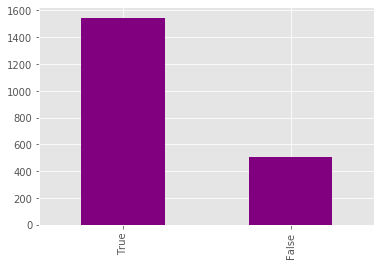

In [588]:
influence['Change'].value_counts().plot.bar(color = "purple")
influence['Change'].value_counts()

Nuetral         744
Liberal         495
Conservative    308
Name: Label1, dtype: int64

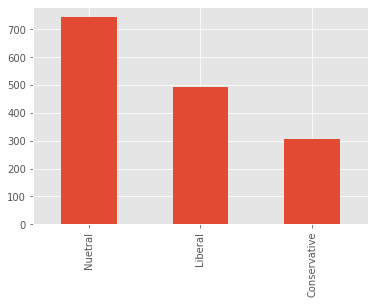

In [627]:
TT = influence[['Change',"Label1"]]

TT2 = TT.sort_values(by="Change", ascending = False)

Trues = TT2[0:1547]
Falses = TT2[1547:2053]

Trues['Label1'].value_counts().plot.bar()
Trues['Label1'].value_counts()

Nuetral         261
Liberal         141
Conservative    104
Name: Label1, dtype: int64

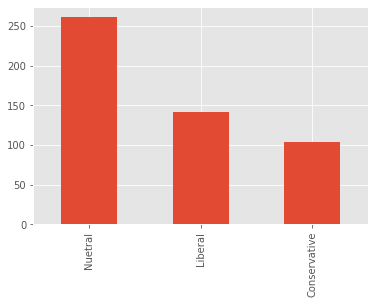

In [629]:
Falses["Label1"].value_counts().plot.bar()
Falses["Label1"].value_counts()

Nuetral         1005
Liberal          636
Conservative     412
Name: Label1, dtype: int64

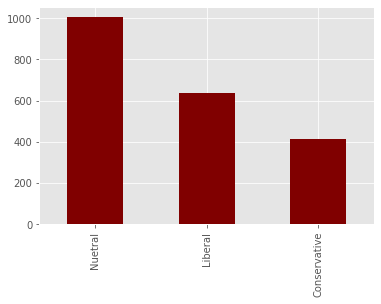

In [586]:
influence['Label1'].value_counts().plot.bar(color = "maroon")
influence['Label1'].value_counts()

Nuetral         956
Liberal         668
Conservative    429
Name: Label2, dtype: int64

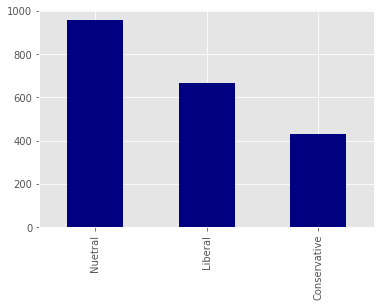

In [587]:
influence['Label2'].value_counts().plot.bar(color = "navy")
influence['Label2'].value_counts()

Fox News    1163
MSNBC        890
Name: Producer, dtype: int64

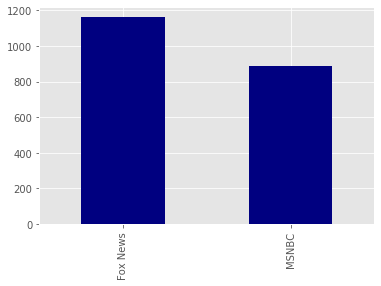

In [432]:
influence['Producer'].value_counts().plot.bar(color = "navy")
influence['Producer'].value_counts()

### Increased Labeling Con/Lib by 2.5% 

In [698]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "jon Q"]

,Producer,Label2,Description
0,MSNBC,Liberal,Republicans can only create two things: defici...


In [697]:
influence[["Description"]].loc[influence['Author'] == "jon Q"]

,Description
0,Republicans can only create two things: defici...


Nuetral         130
Liberal          88
Conservative     58
Name: Label1, dtype: int64

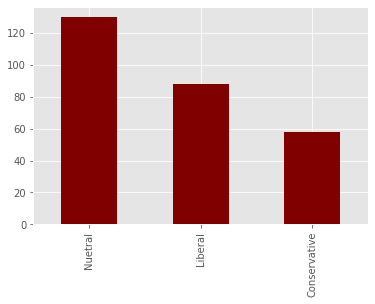

In [651]:
jq = influence.loc[influence['Isreplyto']=="jon Q"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [679]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "T G"]

,Producer,Label2
277,Fox News,Nuetral


Nuetral         83
Conservative    41
Liberal         37
Name: Label1, dtype: int64

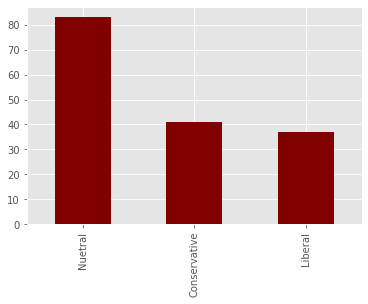

In [652]:
jq = influence.loc[influence['Isreplyto']=="T G"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [693]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "Elmer T Fuddrucker"]

,Producer,Label2
671,Fox News,Conservative


Nuetral         124
Liberal          64
Conservative     33
Name: Label1, dtype: int64

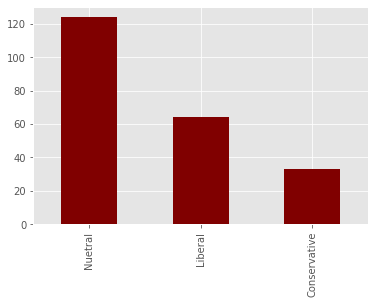

In [690]:
jq = influence.loc[influence['Isreplyto']=="Elmer T Fuddrucker"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [691]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "Laura Folsom"]

,Producer,Label2
439,MSNBC,Conservative


Nuetral         111
Liberal          65
Conservative     55
Name: Label1, dtype: int64

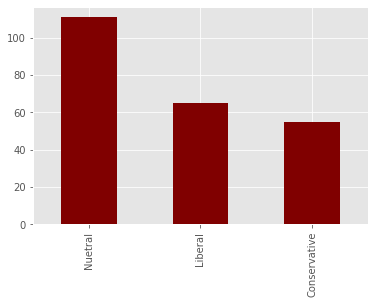

In [696]:
jq = influence.loc[influence['Isreplyto']=="Laura Folsom"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [681]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "Todd Ambrose"]

,Producer,Label2
893,Fox News,Conservative
1015,Fox News,Nuetral
1018,Fox News,Nuetral
1022,Fox News,Liberal
1024,Fox News,Conservative
1031,Fox News,Conservative
1036,Fox News,Nuetral
1054,Fox News,Nuetral
1064,Fox News,Liberal
1095,Fox News,Liberal


Nuetral         94
Liberal         74
Conservative    36
Name: Label1, dtype: int64

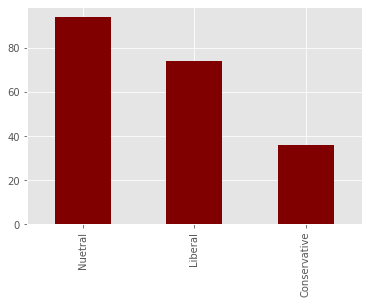

In [658]:
jq = influence.loc[influence['Isreplyto']=="Todd Ambrose"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [682]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "RSKR"]

,Producer,Label2
1098,Fox News,Liberal
1235,Fox News,Conservative
1240,Fox News,Nuetral


Nuetral         99
Liberal         55
Conservative    41
Name: Label1, dtype: int64

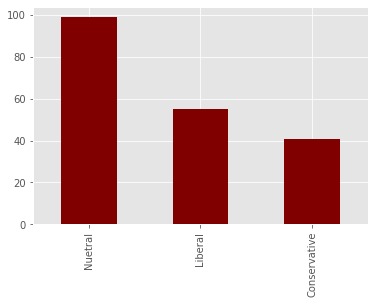

In [663]:
jq = influence.loc[influence['Isreplyto']=="RSKR"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [683]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "Simon West"]

,Producer,Label2
1294,MSNBC,Liberal


Nuetral         96
Liberal         63
Conservative    34
Name: Label1, dtype: int64

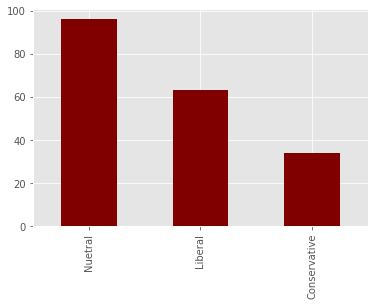

In [665]:
jq = influence.loc[influence['Isreplyto']=="Simon West"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [684]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "william rambo"]

,Producer,Label2
1488,Fox News,Conservative


Nuetral         94
Liberal         52
Conservative    46
Name: Label1, dtype: int64

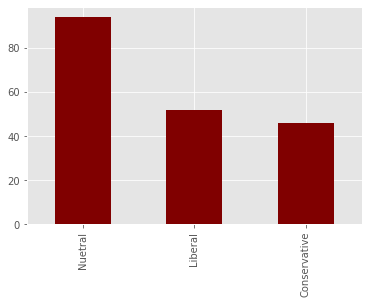

In [667]:
jq = influence.loc[influence['Isreplyto']=="william rambo"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [685]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "kurushiiv"]

,Producer,Label2
1681,MSNBC,Liberal


Nuetral         81
Liberal         72
Conservative    33
Name: Label1, dtype: int64

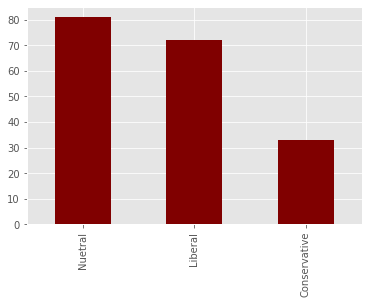

In [671]:
jq = influence.loc[influence['Isreplyto']=="kurushiiv"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [686]:
influence[["Producer", "Label2"]].loc[influence['Author'] == "Tonka Goldman"]

,Producer,Label2
1868,Fox News,Nuetral
1886,Fox News,Nuetral
1887,Fox News,Conservative
1904,Fox News,Conservative
1928,Fox News,Liberal


Nuetral         88
Liberal         63
Conservative    33
Name: Label1, dtype: int64

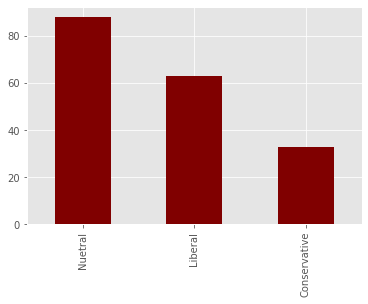

In [673]:
jq = influence.loc[influence['Isreplyto']=="Tonka Goldman"]
jq['Label1'].value_counts().plot.bar(color = "maroon")
jq['Label1'].value_counts()

In [153]:
foxnews = comments[101379:]
msnbc = comments[:101379]

In [157]:
fox = foxnews[['author','Producer']]
ms_nbc = msnbc[['author','Producer']]

In [170]:
ms_nbc.head()

,author,Producer
0,Bruce Molyneux,MSNBC
1,Hybrid - Fahrer,MSNBC
2,marc,MSNBC
3,Conan Barbarian,MSNBC
4,Marcel B.,MSNBC


In [159]:
import numpy as np

### 17.6% of commentors exist in both forums

In [168]:
fox['author'].isin(ms_nbc['author']).value_counts()

False    86021
True     18373
Name: author, dtype: int64

In [172]:
replyto = comments.sort_values(by="replycount", ascending = False)
reply_counts = replyto[["Producer", "author","replycount", "likecount","description", "isreplyto"]]
rc = reply_counts.head(10)
rc

,Producer,author,replycount,likecount,description,isreplyto
37346,MSNBC,jon Q,276,1334,Republicans can only create two things: defici...,NaN
192268,Fox News,T G,247,2740,IsnÛªt it funny a socialist isnÛªt ÛÏpaying...,NaN
65282,MSNBC,Laura Folsom,231,435,What about the president who wanted our troops...,NaN
127614,Fox News,Elmer T Fuddrucker,221,1679,John Kerry is having tantrums over the killing...,NaN
205376,Fox News,Todd Ambrose,204,394,"The dnc, as we know it, will cease to exist by...",NaN
127191,Fox News,RSKR,195,1534,the red line was crossed. they shouldnt be sur...,NaN
49297,MSNBC,Simon West,193,688,Election coming up... Better have a war.,NaN
123887,Fox News,william rambo,192,1165,pretty soon the media will have this Iranian g...,NaN
41362,MSNBC,kurushiiv,186,697,He embezzled from charity while running for of...,NaN
155023,Fox News,Tonka Goldman,184,487,This action was NOT tyrannical. Salami was a l...,NaN


In [194]:
comments.loc[comments['author'] == "jon Q"]

,Producer,guid,link,pubdate,author,title,description,likecount,replycount,isreplyto
36397,MSNBC,Ugw7jRgiXe5i8LJeCXF4AaABAg.93Knx8DooCK93NVGPt_I5Z,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/4/2020 12:27,jon Q,Kakistocracy.,Kakistocracy.,1,0,Finn Jacobsen
37346,MSNBC,Ugzle8JN6dLi-suH77t4AaABAg,https://www.youtube.com/watch?v=HzHak713Anw&lc...,1/3/2020 9:54,jon Q,Republicans can only create two things: defici...,Republicans can only create two things: defici...,1334,276,NaN


### Top 10 on Both:
T G

only one of the top 10 appears on both forums (10%)
